# Apply ROIs, PCA

In [12]:
import numpy as np
from nilearn import image
from nilearn.image import load_img
from nilearn.masking import apply_mask
from nilearn.plotting import plot_img, plot_roi, plot_anat

In [2]:
img = image.load_img("data/sub-001/func/swasub-001_task-stroop_bold.nii")

In [3]:
mask = image.load_img("ROIs/left_retrieval.nii.gz")

In [8]:
roi = mask.get_fdata()

In [18]:
np.all(np.isclose(roi[:, :, :, 0], roi[:, :, :, 1]))

False

## Left Retrieval

In [25]:
left_retrieval_roi = apply_mask(img, image.index_img(mask, 0))

In [30]:
import matplotlib.pyplot as plt

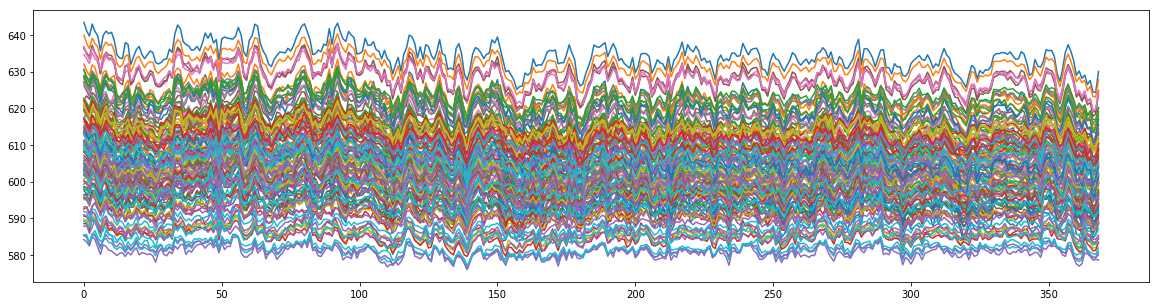

In [35]:
fig = plt.figure()
plt.plot(left_retrieval_roi)
fig.set_size_inches(20, 5)